In [59]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_jitter, theme, element_text, scale_color_manual, geom_point, theme_classic

In [52]:
def rm_color_cats(palette, order, cats):
    if cats:
        keys = palette.keys()
        pop_list = []
        for key in keys:
            if key not in cats:
                pop_list.append(key)
        for p in pop_list:
            del palette[p]
        order = [o for o in order if o in cats]
    return palette, order

#######################################
############# Color palettes
def get_population_colors(cats=None):
    palette = {'ITU': '#db72f2',
                 'PEL': '#ff3a33',
                 'HAC': '#4cb33e',
                 'AJI': '#46bff0',
                 'LWK': '#A09136',
                 'YRI': '#DFBD00',
                 'CEU': '#347eed',
                 'MPC': '#eb9d0c'}

    order = list(palette.keys())
    order.sort()

    palette, order = rm_color_cats(palette, order, cats)
    return palette, order

/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_49404/1900194312.py:25: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


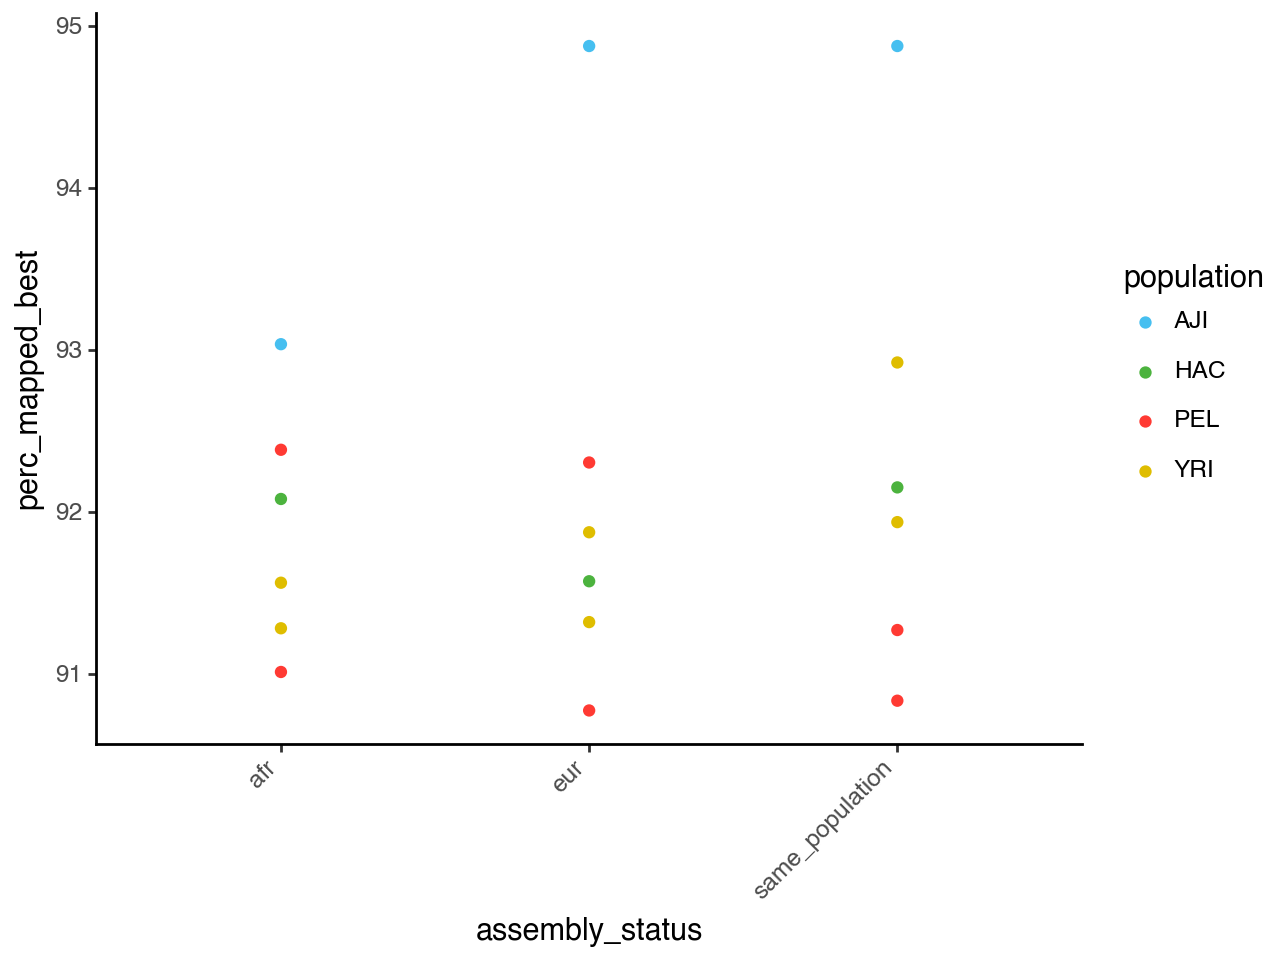

In [61]:
df = pd.read_csv('map_personal_summary_1.tsv', sep='\t')
c_dict, order = get_population_colors(df.population.unique().tolist())

assemblies = ['same_population_sample', 'afr_sample', 'european_sample']
df = df[['population']+[f'perc_{a}' for a in assemblies]]

df = df.melt(id_vars=['population'],
             var_name='assembly_status', value_name='perc_mapped_best')

m = {'perc_same_population_sample':'same_population',
     'perc_afr_sample':'afr',
     'perc_european_sample':'eur'}
df.assembly_status = df.assembly_status.map(m)
df.head()

# Create the plot
p = (ggplot(df, aes(x='assembly_status', y='perc_mapped_best', color='population'))
     + geom_point()  # Hide default outliers so jitter dots are clear
     + scale_color_manual(values=c_dict)  # Apply custom color palette
     + theme_classic() 
     + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x labels for better fit
)

# Display the plot
print(p)

/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_49404/4153766948.py:25: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


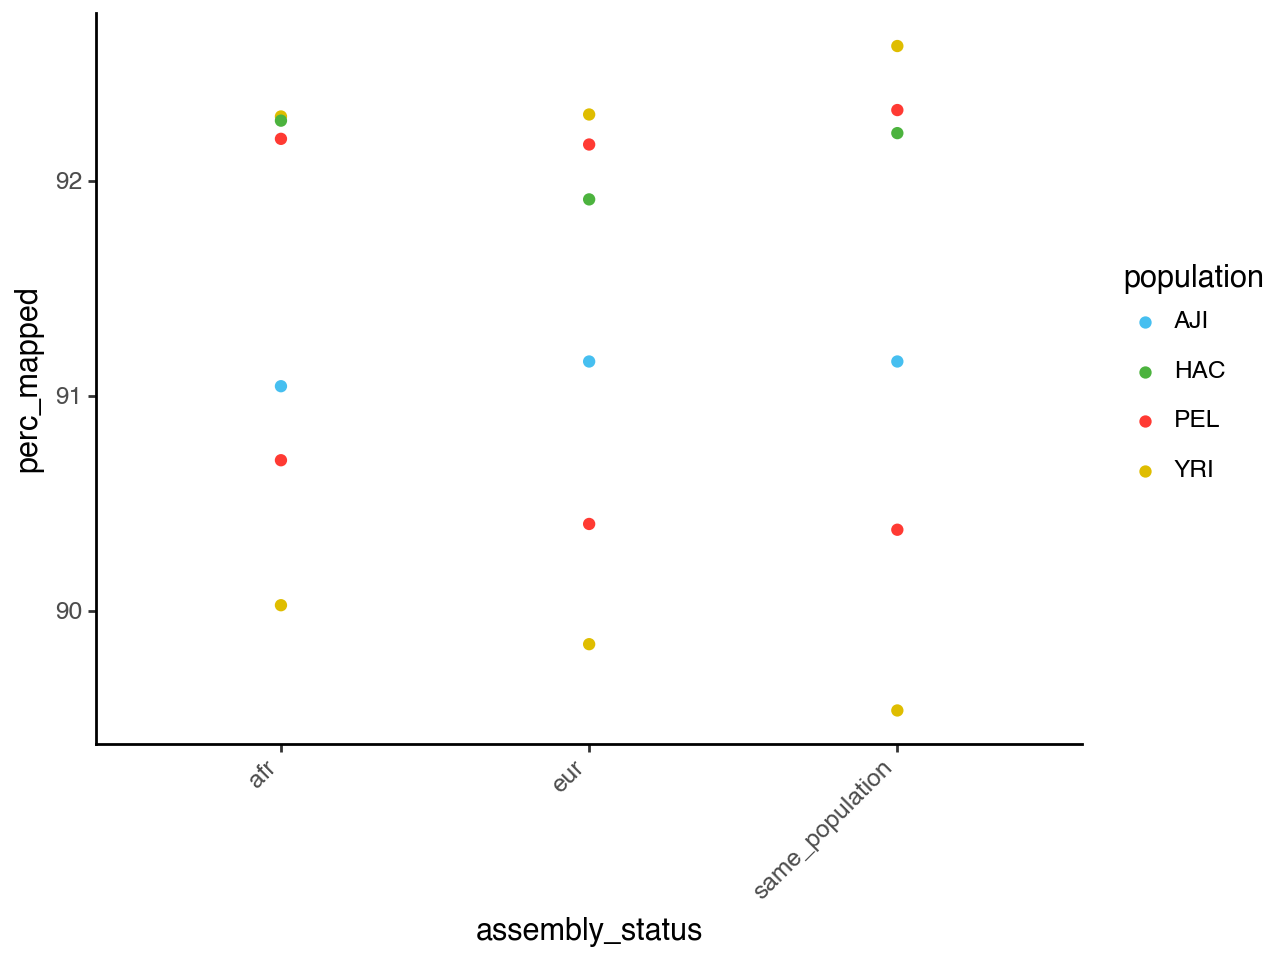

In [63]:
df = pd.read_csv('map_personal_summary_at_all_10.tsv', sep='\t')
c_dict, order = get_population_colors(df.population.unique().tolist())

assemblies = ['same_population_sample', 'afr_sample', 'european_sample']
df = df[['population']+[f'perc_{a}' for a in assemblies]]

df = df.melt(id_vars=['population'],
             var_name='assembly_status', value_name='perc_mapped')

m = {'perc_same_population_sample':'same_population',
     'perc_afr_sample':'afr',
     'perc_european_sample':'eur'}
df.assembly_status = df.assembly_status.map(m)
df.head()

# Create the plot
p = (ggplot(df, aes(x='assembly_status', y='perc_mapped', color='population'))
     + geom_point()  # Hide default outliers so jitter dots are clear
     + scale_color_manual(values=c_dict)  # Apply custom color palette
     + theme_classic() 
     + theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x labels for better fit
)

# Display the plot
print(p)

/var/folders/ch/bc1lrgbd1fn_3gxz886mxjz00000gn/T/ipykernel_49404/3281241521.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


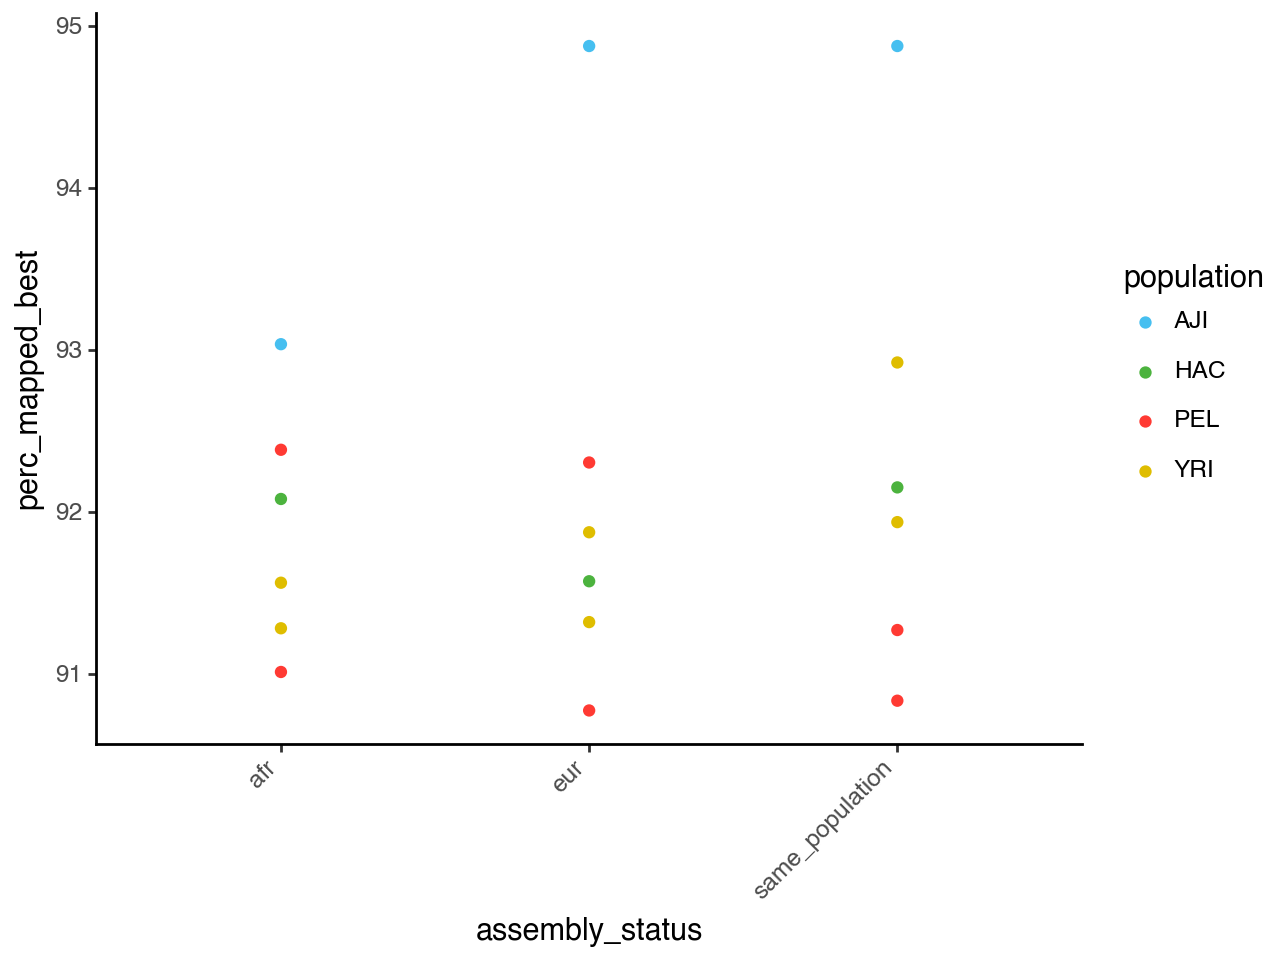